In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=79f1c99fbd2f3944bbf4f5b231108a42


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | guasdualito
Processing Record 2 of Set 13 | chuy
Processing Record 3 of Set 13 | mataura
Processing Record 4 of Set 13 | mayo
Processing Record 5 of Set 13 | abalak
Processing Record 6 of Set 13 | hermanus
Processing Record 7 of Set 13 | yumen
Processing Record 8 of Set 13 | nalut
Processing Record 9 of Set 13 | provideniya
Processing Record 10 of Set 13 | tukums
Processing Record 11 of Set 13 | clyde river
Processing Record 12 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 13 | east london
Processing Record 14 of Set 13 | chokurdakh
Processing Record 15 of Set 13 | sao filipe
Processing Record 16 of Set 13 | general roca
Processing Record 17 of Set 13 | huancabamba
Processing Record 18 of Set 13 | pangnirtung
Processing Record 19 of Set 13 | novikovo
Processing Record 20 of Set 13 | lavrentiya
Processing Record 21 of Set 13 | lompoc
Processing Record 22 of Set 13 

Processing Record 37 of Set 16 | pangkalanbuun
Processing Record 38 of Set 16 | seoul
Processing Record 39 of Set 16 | moree
Processing Record 40 of Set 16 | kungurtug
Processing Record 41 of Set 16 | merauke
Processing Record 42 of Set 16 | walvis bay
Processing Record 43 of Set 16 | saint-augustin
Processing Record 44 of Set 16 | nelson bay
Processing Record 45 of Set 16 | lata
Processing Record 46 of Set 16 | lagoa
Processing Record 47 of Set 16 | bambous virieux
Processing Record 48 of Set 16 | majene
Processing Record 49 of Set 16 | kodiak
Processing Record 50 of Set 16 | qui nhon
Processing Record 1 of Set 17 | kaitong
Processing Record 2 of Set 17 | new norfolk
Processing Record 3 of Set 17 | asfi
Processing Record 4 of Set 17 | belyy yar
Processing Record 5 of Set 17 | gushikawa
Processing Record 6 of Set 17 | leninskoye
Processing Record 7 of Set 17 | bull savanna
Processing Record 8 of Set 17 | quatre cocos
Processing Record 9 of Set 17 | hami
Processing Record 10 of Set 17 |

Processing Record 23 of Set 20 | pullman
Processing Record 24 of Set 20 | halifax
Processing Record 25 of Set 20 | hamilton
Processing Record 26 of Set 20 | japura
Processing Record 27 of Set 20 | katsuura
Processing Record 28 of Set 20 | springbok
Processing Record 29 of Set 20 | kavaratti
Processing Record 30 of Set 20 | arlit
Processing Record 31 of Set 20 | tumpat
Processing Record 32 of Set 20 | ambodifototra
City not found. Skipping...
Processing Record 33 of Set 20 | barentsburg
City not found. Skipping...
Processing Record 34 of Set 20 | agucadoura
Processing Record 35 of Set 20 | yomitan
City not found. Skipping...
Processing Record 36 of Set 20 | atherton
Processing Record 37 of Set 20 | norman wells
Processing Record 38 of Set 20 | rudnyy
Processing Record 39 of Set 20 | santa elena
Processing Record 40 of Set 20 | barcelos
Processing Record 41 of Set 20 | husavik
Processing Record 42 of Set 20 | bhinmal
Processing Record 43 of Set 20 | grand gaube
Processing Record 44 of Se

Processing Record 8 of Set 24 | utiroa
City not found. Skipping...
Processing Record 9 of Set 24 | arvika
Processing Record 10 of Set 24 | pangody
Processing Record 11 of Set 24 | pingzhuang
Processing Record 12 of Set 24 | palmer
Processing Record 13 of Set 24 | asha
Processing Record 14 of Set 24 | newport
Processing Record 15 of Set 24 | bac lieu
Processing Record 16 of Set 24 | arefu
Processing Record 17 of Set 24 | sokoni
Processing Record 18 of Set 24 | vidim
Processing Record 19 of Set 24 | yar-sale
Processing Record 20 of Set 24 | luanda
Processing Record 21 of Set 24 | taruma
Processing Record 22 of Set 24 | sheridan
Processing Record 23 of Set 24 | anderson
Processing Record 24 of Set 24 | hammerfest
Processing Record 25 of Set 24 | salair
Processing Record 26 of Set 24 | havoysund
Processing Record 27 of Set 24 | pousat
City not found. Skipping...
Processing Record 28 of Set 24 | colac
Processing Record 29 of Set 24 | vrangel
Processing Record 30 of Set 24 | kahului
Processi

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guasdualito,7.2424,-70.7324,91.20,47,95,4.56,VE,2021-04-13 18:45:42
1,Chuy,-33.6971,-53.4616,70.59,56,0,3.71,UY,2021-04-13 18:45:43
2,Mataura,-46.1927,168.8643,51.01,96,100,7.00,NZ,2021-04-13 18:45:43
3,Mayo,38.8876,-76.5119,61.00,67,75,9.22,US,2021-04-13 18:43:19
4,Abalak,58.1286,68.5944,41.20,73,53,8.88,RU,2021-04-13 18:45:43
5,Hermanus,-34.4187,19.2345,62.01,89,8,3.00,ZA,2021-04-13 18:45:43
6,Yumen,40.2833,97.2000,44.56,30,0,2.75,CN,2021-04-13 18:45:44
7,Nalut,30.3333,10.8500,66.76,46,98,20.33,LY,2021-04-13 18:45:44
8,Provideniya,64.3833,-173.3000,18.30,93,100,14.14,RU,2021-04-13 18:43:31
9,Tukums,56.9669,23.1553,39.20,75,75,4.61,LV,2021-04-13 18:45:44


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df  = city_data_df [new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guasdualito,VE,2021-04-13 18:45:42,7.2424,-70.7324,91.20,47,95,4.56
1,Chuy,UY,2021-04-13 18:45:43,-33.6971,-53.4616,70.59,56,0,3.71
2,Mataura,NZ,2021-04-13 18:45:43,-46.1927,168.8643,51.01,96,100,7.00
3,Mayo,US,2021-04-13 18:43:19,38.8876,-76.5119,61.00,67,75,9.22
4,Abalak,RU,2021-04-13 18:45:43,58.1286,68.5944,41.20,73,53,8.88


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

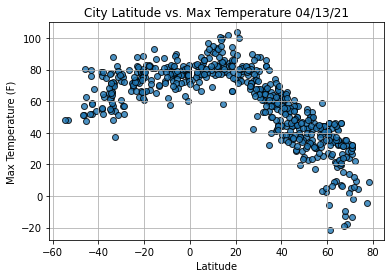

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

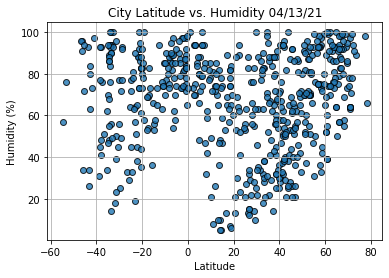

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

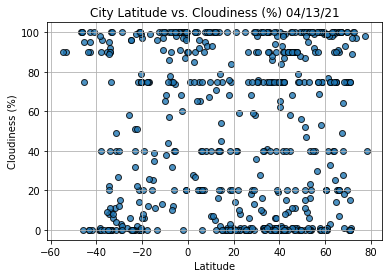

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()